<a href="https://colab.research.google.com/github/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S03_Tipos_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Curso Deep Learning: Economía</h1>

## S03: Datos no estructurados

# Tabla de contenido

Temática:

- ¿Qué son los datos no estructurados?.
- Como tratar los datos no estructurados.

# Datos no estructurados: Deep Dive

Los datos no estructurados corresponden a información que no se organiza de acuerdo con un modelo o esquema de datos preestablecido y, por tanto, no se puede almacenar en una base de datos tradicional o RDBMS (Relational Database Managment System). El texto y la multimedia son dos tipos comunes de contenido estructurado. Algunos ejemplos concretos son:

- Muchos documentos comerciales
- Mensajes de correo electrónico
- Videos 
- Fotos
- Páginas web
- Archivos de audio

Entre el 80% y 90% de los datos generados y recopilados por las organizaciones corresponden a datos no estructurados. La velocidad con que la que crecen estos tipos de datos es, en ocasiones, más rápida que el volumen de los datos no estructurados.

Los almacenamientos de datos no estructurados contienen una gran cantidad de información que se puede usar para orientar las decisiones comerciales. Sin embargo, históricamente los datos no estructurados han sido dificil de analizar. Con la ayuda de la inteligencia artificial y el aprendizaje automático, han surgido nuevas herramientas que pueden buscar en estas grandes cantidades de datos para obtener respuesta a diferentes problemas planteados desde una visión de inteligencia de negocios.

La pregunta principal respecto a esto datos es:

**¿Cómo se pasa tipos de datos diversos como imágenes y sonidos, a una tabla donde se tienen características con valores numéricos?**

Esquemáticamente se tiene que resolver cualquiera de los siguientes problemas

<p><img alt="Unstructure data to Tables" height="200px" src="https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/images/DL_S03_Untructured_Data_To_Tables.png?raw=true" align="center" vspace="15px"></p>

en donde, con ayuda de herramientas de deep learning, podemos transformar los datos no estructurados en tablas. 

## Imágenes en escala de grises

Las imágenes digitales corresponden a un arreglo matricial de píxeles con cierto valor (ver siguiente imagen).

<p><img alt="Unstructure data to Tables" height="250px" src="https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/images/DL_S03_Gray_Digital_Image.png?raw=true" align="center" vspace="15px"></p>

En general, una imagen en escala de grises tendrá un rango de valores dependiendo de la **profundiad de pixel de la imagen**, la cual se da en bits. En la siguiente imagen se ilustran varias profundidades. 

<p><img alt="Unstructure data to Tables" height="250px" src="https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/images/DL_S03_Pixel_Depth.png?raw=true" align="center" vspace="15px"></p>

Como puede advertirse, la cantidad de valores para cierta profundidad de pixel puede determinarse como una potencia de 2. En la siguiente tabla se muestra los posibles valores según la profundidad de pixels.

Profundidad de Pixel | Cantidad de Valores
--|--
1|$2^1=2$
2|$2^2=4$
3|$2^3=8$
4|$2^4=16$
5|$2^5=32$
6|$2^6=64$
8|$2^8=256$
16|$2^{16}=65536$

### Imágenes de 8 y 16 bits

A continuación se descargarán dos imágenes, una de 8 bits y otra de 16 bits, del repositorio de clase para ilustrar los valores almacenados por los píxeles.

In [1]:
!rm DL*
!wget https://github.com/ssanchezgoe/curso_deep_learning_economia/raw/main/images/DL_S03_peppers2.tif
!wget https://github.com/ssanchezgoe/curso_deep_learning_economia/raw/main/images/DL_S03_EPI.tif
!wget https://github.com/ssanchezgoe/curso_deep_learning_economia/raw/main/images/DL_S03_RGB_Lena.jpeg
!wget https://raw.githubusercontent.com/ssanchezgoe/curso_deep_learning_economia/main/dependencies/DL_Utils_Images.py

--2021-07-23 19:44:11--  https://github.com/ssanchezgoe/curso_deep_learning_economia/raw/main/images/DL_S03_peppers2.tif
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ssanchezgoe/curso_deep_learning_economia/main/images/DL_S03_peppers2.tif [following]
--2021-07-23 19:44:11--  https://raw.githubusercontent.com/ssanchezgoe/curso_deep_learning_economia/main/images/DL_S03_peppers2.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262274 (256K) [image/tiff]
Saving to: ‘DL_S03_peppers2.tif’

DL_S03_peppers2.tif 100%[===================>] 256.13K  --.-KB/s    in 0.02s   

2021-07-23 19:44:11 (1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import DL_Utils_Images as Utils_Images

Profundidad de pixel uint8
Valores (min, max): (0,229)
Dimensiones de la imagen: (512, 512)


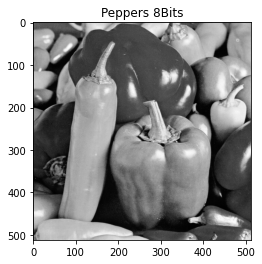

In [3]:
Utils_Images.image_info("DL_S03_peppers2.tif")
Utils_Images.imshow("DL_S03_peppers2.tif", cmap='gray', title='Peppers 8Bits')

Profundidad de pixel uint16
Valores (min, max): (21,61499)
Dimensiones de la imagen: (1024, 1024)


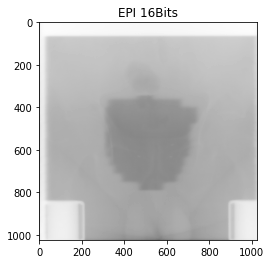

In [4]:
Utils_Images.image_info("DL_S03_EPI.tif")
Utils_Images.imshow("DL_S03_EPI.tif", cmap='gray', title='EPI 16Bits')

## Imágenes a color

Una imagen a color corresponde a un arreglo en 3 canales (ver imagen a continuación) de los colores primarios rojo, verde y azul, de ahí su nombre en ingles RGB (Red, Green and Blue)


<p><img alt="Unstructure data to Tables" height="300px" src="https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/images/DL_S03_RGB.png?raw=true" align="center" vspace="15px"></p>



Profundidad de pixel uint8
Valores (min, max): (0,255)
Dimensiones de la imagen: (512, 512, 3)


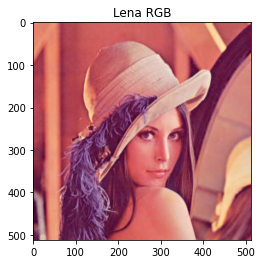

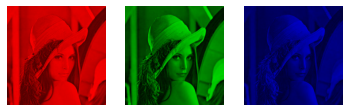

In [5]:
Utils_Images.image_info("DL_S03_RGB_Lena.jpeg")
Utils_Images.imshow("DL_S03_RGB_Lena.jpeg", title='Lena RGB')
Utils_Images.imshow_RGB("DL_S03_RGB_Lena.jpeg")